In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [2]:

# Directory containing CSV files
data_directory = 'data'

# List to store DataFrames from each CSV file
dfs = []

# Iterate over CSV files in the directory
for filename in os.listdir(data_directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_directory, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate all DataFrames in the list
final_df = pd.concat(dfs, ignore_index=True)


In [3]:
final_df

,user_id,timestamp,cctv_location
0,user-1,2023-12-01 08:15:00,CCTV-5
1,user-1,2023-12-02 12:30:00,CCTV-5
2,user-1,2023-12-03 14:45:00,CCTV-5
3,user-1,2023-12-04 10:20:00,CCTV-5
4,user-1,2023-12-05 09:30:00,CCTV-5
5,user-1,2023-12-06 15:00:00,CCTV-10
6,user-1,2023-12-07 11:15:00,CCTV-25
7,user-1,2023-12-08 16:45:00,CCTV-17
8,user-1,2023-12-09 14:00:00,CCTV-40
9,user-1,2023-12-10 08:30:00,CCTV-30


In [4]:
final_df['timestamp'] = pd.to_datetime(final_df['timestamp'])
final_df['date'] = final_df['timestamp'].dt.date
final_df['minutes'] = final_df['timestamp'].dt.hour * 60 + final_df['timestamp'].dt.minute


In [5]:
df = final_df

In [6]:
le = LabelEncoder()
df['encoded_user_id'] = le.fit_transform(df['user_id'])
df['encoded_cctv_location'] = le.fit_transform(df['cctv_location'])

Feat for cctv

In [7]:
features = df[['encoded_user_id', 'encoded_cctv_location']]
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)


feat for user id

In [8]:
features2 = df[['encoded_user_id']]
scaler2 = StandardScaler()
features_standardized2 = scaler2.fit_transform(features2)


Feat 1

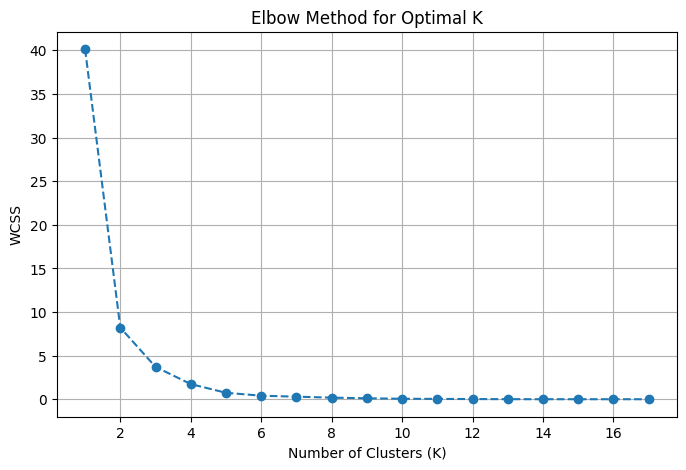

In [9]:
# Apply PCA
pca = PCA(n_components=1)
pca_result = pca.fit_transform(features_standardized)

# KMeans Elbow Method with the number of clusters equal to the number of unique CCTV locations
num_clusters = len(df['cctv_location'].unique())
wcss = []
for i in range(1, num_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_result)  # Use the PCA result instead of standardized features
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

feat 2

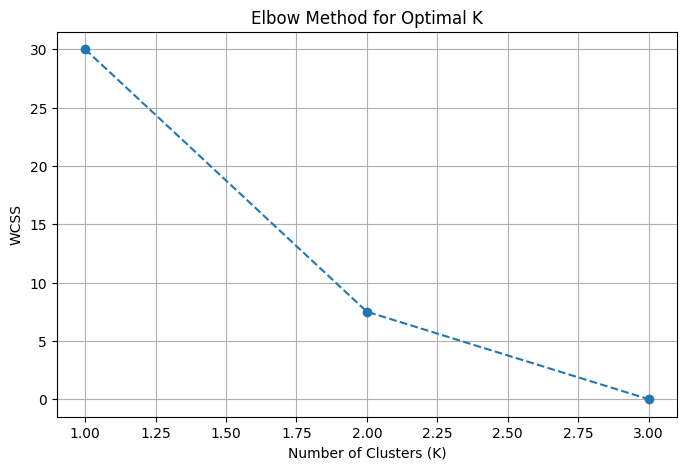

In [10]:
# Apply PCA
pca = PCA(n_components=1)
pca_result = pca.fit_transform(features_standardized2)

# KMeans Elbow Method with the number of clusters equal to the number of unique CCTV locations
num_clusters = len(df['user_id'].unique())
wcss = []
for i in range(1, num_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_result)  # Use the PCA result instead of standardized features
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [11]:
len(df['cctv_location'].unique())

17

feat 1

In [12]:
# Using k-means clustering with k=3 (you can choose a different value based on your requirements)
kmeans = KMeans(n_clusters=len(df['cctv_location'].unique()))
df['cluster'] = kmeans.fit_predict(features_standardized)

/home/nanda/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


feat 2

In [13]:
# Using k-means clustering with k=3 (you can choose a different value based on your requirements)
kmeans2 = KMeans(n_clusters=len(df['user_id'].unique()))
df['cluster2'] = kmeans2.fit_predict(features_standardized2)

/home/nanda/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


feat 1

In [14]:
silhouette_avg = silhouette_score(features_standardized, df['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.538888869675337


feat 2

In [15]:
silhouette_avg2 = silhouette_score(features_standardized2, df['cluster2'])
print(f"Silhouette Score: {silhouette_avg2}")

Silhouette Score: 1.0


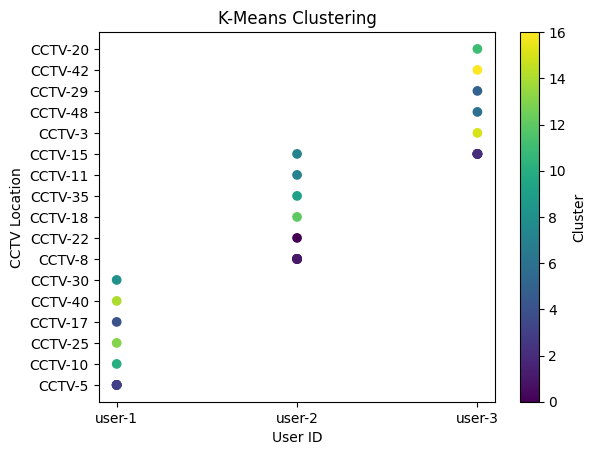

In [16]:
plt.scatter(df['user_id'], df['cctv_location'], c=df['cluster'], cmap='viridis')
plt.xlabel('User ID')
plt.ylabel('CCTV Location')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [17]:
len(df['cluster'].unique())

17

In [18]:
filtered_df = df[df['user_id'] == 'user-2']
filtered_df2 = df[df['user_id'] == 'user-1']
filtered_df3 =  df[df['user_id'] == 'user-3']

In [19]:
filtered_df[['user_id', 'cctv_location', 'cluster']]

,user_id,cctv_location,cluster
10,user-2,CCTV-8,1
11,user-2,CCTV-8,1
12,user-2,CCTV-8,1
13,user-2,CCTV-8,1
14,user-2,CCTV-8,1
15,user-2,CCTV-22,0
16,user-2,CCTV-18,12
17,user-2,CCTV-35,9
18,user-2,CCTV-11,7
19,user-2,CCTV-15,7


In [20]:
filtered_df2[['user_id', 'cctv_location', 'cluster']]

,user_id,cctv_location,cluster
0,user-1,CCTV-5,3
1,user-1,CCTV-5,3
2,user-1,CCTV-5,3
3,user-1,CCTV-5,3
4,user-1,CCTV-5,3
5,user-1,CCTV-10,10
6,user-1,CCTV-25,13
7,user-1,CCTV-17,4
8,user-1,CCTV-40,14
9,user-1,CCTV-30,8


In [21]:
filtered_df3[['user_id', 'cctv_location', 'cluster']]

,user_id,cctv_location,cluster
20,user-3,CCTV-15,2
21,user-3,CCTV-15,2
22,user-3,CCTV-15,2
23,user-3,CCTV-15,2
24,user-3,CCTV-15,2
25,user-3,CCTV-3,15
26,user-3,CCTV-48,6
27,user-3,CCTV-29,5
28,user-3,CCTV-42,16
29,user-3,CCTV-20,11


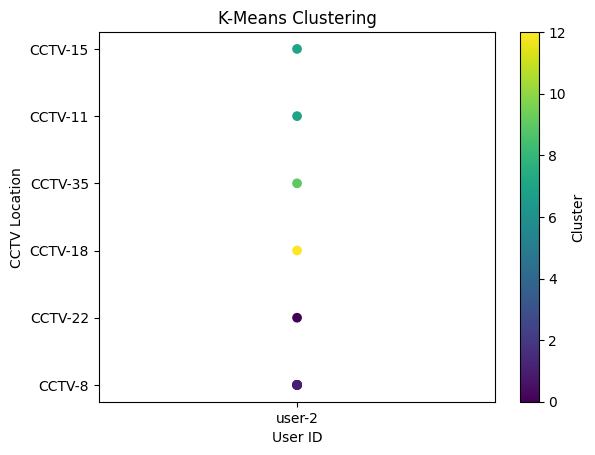

In [22]:
# Plotting
plt.scatter(filtered_df['user_id'], filtered_df['cctv_location'], c=filtered_df['cluster'], cmap='viridis')
plt.xlabel('User ID')
plt.ylabel('CCTV Location')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

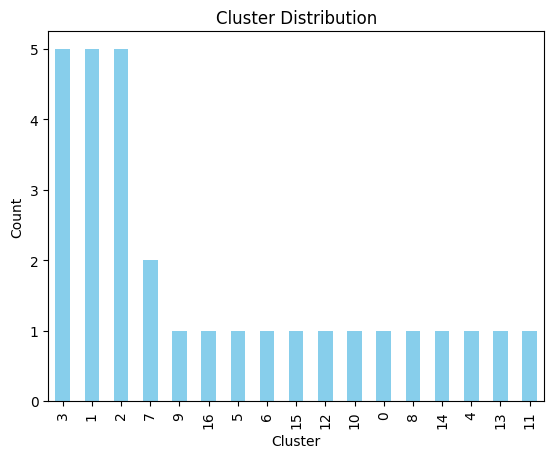

In [23]:
cluster_counts = df['cluster'].value_counts()

# Plotting the bar chart
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Distribution')
plt.show()

<h2>DBSCAN</h2>

In [24]:
# from sklearn.cluster import DBSCAN

In [5]:
import pandas as pd
import os

In [15]:

# Directory containing CSV files
data_directory = 'data/user_active_log/'

# List to store DataFrames from each CSV file
dfs = []

# Iterate over CSV files in the directory
for filename in os.listdir(data_directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_directory, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate all DataFrames in the list
final_df = pd.concat(dfs, ignore_index=True)


In [8]:
final_df

,user_id,timestamp
0,user-0_activeLogs,2024-01-18 10:14:15
1,user-4_activeLogs,2024-01-18 10:14:15
2,user-1_activeLogs,2024-01-18 10:14:15
3,user-2_activeLogs,2024-01-18 10:14:15
4,user-3_activeLogs,2024-01-18 10:14:15
...,...,...
9995,user-9993_activeLogs,2024-01-18 10:14:26
9996,user-9994_activeLogs,2024-01-18 10:14:26
9997,user-9995_activeLogs,2024-01-18 10:14:26
9998,user-9997_activeLogs,2024-01-18 10:14:26


In [16]:

df = final_df

# Identify duplicate rows based on the 'user' column
duplicate_rows = df[df.duplicated(subset=['user_id'], keep=False)]

# Display the duplicate rows
print(duplicate_rows)

Empty DataFrame
Columns: [user_id, timestamp]
Index: []
